In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from tqdm.notebook import tqdm, tnrange
from sklearn.decomposition import FastICA
from sklearn.cluster import KMeans
import pandas as pd


In [ ]:
basepath = Path('/media/genzel/Data/Hexmaze/maze_videos/').resolve()
# basepath = Path('2021-03-12_09-44-08/').resolve()
videos = list(sorted(basepath.glob('eye*.mp4')))
print(videos)
crop_instruct = Path(basepath / videos[0].name[6:]).with_suffix('.led_crop')
print(crop_instruct, "-- Exists:", crop_instruct.exists())

[PosixPath('/media/genzel/Data/Hexmaze/maze_videos/eye01_2020-11-09_12-34-18.mp4'), PosixPath('/media/genzel/Data/Hexmaze/maze_videos/eye02_2020-11-09_12-34-18.mp4'), PosixPath('/media/genzel/Data/Hexmaze/maze_videos/eye03_2020-11-09_12-34-18.mp4'), PosixPath('/media/genzel/Data/Hexmaze/maze_videos/eye04_2020-11-09_12-34-18.mp4'), PosixPath('/media/genzel/Data/Hexmaze/maze_videos/eye05_2020-11-09_12-34-18.mp4'), PosixPath('/media/genzel/Data/Hexmaze/maze_videos/eye06_2020-11-09_12-34-18.mp4'), PosixPath('/media/genzel/Data/Hexmaze/maze_videos/eye07_2020-11-09_12-34-18.mp4'), PosixPath('/media/genzel/Data/Hexmaze/maze_videos/eye08_2020-11-09_12-34-18.mp4'), PosixPath('/media/genzel/Data/Hexmaze/maze_videos/eye09_2020-11-09_12-34-18.mp4'), PosixPath('/media/genzel/Data/Hexmaze/maze_videos/eye10_2020-11-09_12-34-18.mp4'), PosixPath('/media/genzel/Data/Hexmaze/maze_videos/eye11_2020-11-09_12-34-18.mp4'), PosixPath('/media/genzel/Data/Hexmaze/maze_videos/eye12_2020-11-09_12-34-18.mp4')]
/me

# Extract example frames

Use these to find the center of the led visible in the image, and note `filepath, x, y` in the `.led_crop` file

Run this if there are no example images with the videos yet

In [ ]:
#overwrite is set to false to prevent existing image files to be overwritten by defailt
overwrite = False
if crop_instruct.exists() and overwrite:
    print(f'Deleting existing crop file {crop_instruct}')
    crop_instruct.unlink()
    
#create a video capture of first frame for each video, tqdm is used to create a progress bar
for vid in tqdm(videos):
    cap = cv2.VideoCapture(str(vid))
    rv, frame = cap.read()
    outfile = vid.with_suffix('.png')
    if not outfile.exists() or overwrite:
        cv2.imwrite(str(vid.with_suffix('.png')), frame)

    if overwrite:
        with open(crop_instruct, 'a') as led_crop_file:
            led_crop_file.write(f'{str(vid)}, , \n')
    print(str(vid.with_suffix('.png')))

  0%|          | 0/12 [00:00<?, ?it/s]

/media/genzel/Data/Hexmaze/maze_videos/eye01_2020-11-09_12-34-18.png
/media/genzel/Data/Hexmaze/maze_videos/eye02_2020-11-09_12-34-18.png
/media/genzel/Data/Hexmaze/maze_videos/eye03_2020-11-09_12-34-18.png
/media/genzel/Data/Hexmaze/maze_videos/eye04_2020-11-09_12-34-18.png
/media/genzel/Data/Hexmaze/maze_videos/eye05_2020-11-09_12-34-18.png
/media/genzel/Data/Hexmaze/maze_videos/eye06_2020-11-09_12-34-18.png
/media/genzel/Data/Hexmaze/maze_videos/eye07_2020-11-09_12-34-18.png
/media/genzel/Data/Hexmaze/maze_videos/eye08_2020-11-09_12-34-18.png
/media/genzel/Data/Hexmaze/maze_videos/eye09_2020-11-09_12-34-18.png
/media/genzel/Data/Hexmaze/maze_videos/eye10_2020-11-09_12-34-18.png
/media/genzel/Data/Hexmaze/maze_videos/eye11_2020-11-09_12-34-18.png
/media/genzel/Data/Hexmaze/maze_videos/eye12_2020-11-09_12-34-18.png


# Create cropped RGB image stacks around the LED centers

Can optionally create RGB and YUV stacks, though RGB turned out to be sufficient for extraction of most views

In [ ]:
with open(crop_instruct) as f:
    crop_txt = f.readlines()
# print(crop_txt)
overwrite = False
crop = 16

#command to crop
FFMPEG_CMD = 'ffmpeg -hide_banner -y -i "{infile}" -vf crop={crop}:{crop}:{x}:{y} -c:v rawvideo -pix_fmt {fmt} "{outfile}"'
formats = {'rgb': 'rgb24'}  # , 'yuv': 'yuv444p'

#read line by line and split in three values the data from crop_txt
for line in tqdm(crop_txt):
    try:
        v, x, y = line.split(',')
        x, y = int(x), int(y)
    except ValueError:
        print("Faulty line:", line, 'Maybe led coordinates are missing?')
        break

    infile = basepath / Path(v).name

    print(infile)

    
    for ext, fmt in formats.items():
        # print(ext)
        outfile = basepath / Path(v).with_suffix('.'+ext).name
        # print(outfile)
        if overwrite or not outfile.exists():
            cmd = FFMPEG_CMD.format(infile=str(infile), crop=crop, x=x-crop//2, y=y-crop//2, fmt=fmt, outfile=str(outfile));
            os.system(cmd);

  0%|          | 0/12 [00:00<?, ?it/s]

/media/genzel/Data/Hexmaze/maze_videos/eye01_2020-11-09_12-34-18.mp4
/media/genzel/Data/Hexmaze/maze_videos/eye02_2020-11-09_12-34-18.mp4
/media/genzel/Data/Hexmaze/maze_videos/eye03_2020-11-09_12-34-18.mp4
/media/genzel/Data/Hexmaze/maze_videos/eye04_2020-11-09_12-34-18.mp4
/media/genzel/Data/Hexmaze/maze_videos/eye05_2020-11-09_12-34-18.mp4
/media/genzel/Data/Hexmaze/maze_videos/eye06_2020-11-09_12-34-18.mp4
/media/genzel/Data/Hexmaze/maze_videos/eye07_2020-11-09_12-34-18.mp4
/media/genzel/Data/Hexmaze/maze_videos/eye08_2020-11-09_12-34-18.mp4
/media/genzel/Data/Hexmaze/maze_videos/eye09_2020-11-09_12-34-18.mp4
/media/genzel/Data/Hexmaze/maze_videos/eye10_2020-11-09_12-34-18.mp4
/media/genzel/Data/Hexmaze/maze_videos/eye11_2020-11-09_12-34-18.mp4
/media/genzel/Data/Hexmaze/maze_videos/eye12_2020-11-09_12-34-18.mp4


# Generate image stack arrays in RGB, HSV and YUV

In [ ]:
#read rgb_frames from array and reshape from 3 dimensions to 4
rgb_frames = np.fromfile(videos[0].with_suffix('.rgb'), dtype=np.uint8).reshape(-1, 16, 16, 3)
#yuv_frames was commented but it is a needed variable
#yuv_frames = np.fromfile(videos[0].with_suffix('.yuv'), dtype=np.uint8).reshape(-1, 16, 16, 3)

#convert rgb frames to hsv format
hsv_frames = np.zeros_like(rgb_frames)
for n in range(rgb_frames.shape[0]):
    hsv_frames[n,:,:,:] = cv2.cvtColor(rgb_frames[n,:,:,:], cv2.COLOR_RGB2HSV).astype(float)

# Classic

Get a mask of "active pixels" from product of saturation and value.

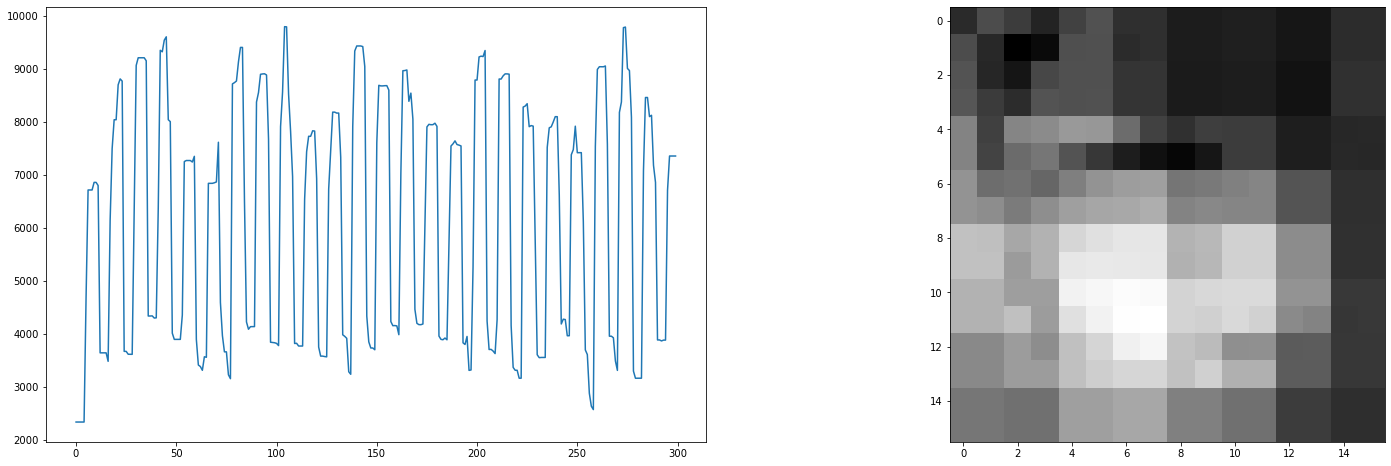

In [ ]:
#The product of saturation and value is used to measure color intesnity or strength taking into account 
#purity and brightness.

hv = hsv_frames[:,:,:,1].astype(float) * hsv_frames[:,:,:,2].astype(float)

#create a mask from the product to find the degree of colorfulness in each pixel
hv_mask = hv.mean(axis=0)
hv_mask = (hv_mask -hv_mask.min()) / (hv_mask.max() - hv_mask.min())
hvs = hv.mean(axis=1).mean(axis=1)

#plot the hsv values of the first 300 frames and display hv_mask
fig, ax = plt.subplots(1, 2, figsize=(26, 8))
ax[0].plot(hvs[:300])
ax[1].imshow(hv_mask, cmap='gray')

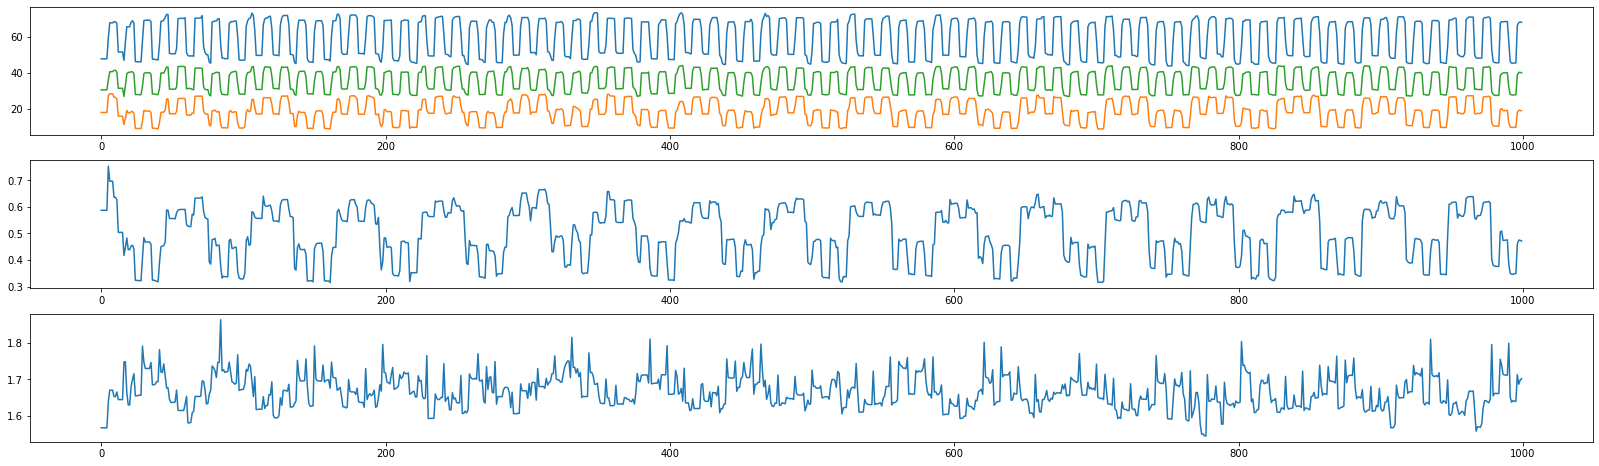

In [ ]:
# Display red, green and lue color channels after applying the mask for the first 1000 frames, 
N = 1000
r = (rgb_frames[:N,:,:,0].astype(float)*hv_mask).mean(axis=1).mean(axis=1)

#red and blue plots are shifted to avoid overlapping
g = (rgb_frames[:N,:,:,1].astype(float)*hv_mask).mean(axis=1).mean(axis=1)+15
b = (rgb_frames[:N,:,:,2].astype(float)*hv_mask).mean(axis=1).mean(axis=1)+30
fig, ax = plt.subplots(3, figsize=(28, 8))
ax[0].plot(b)
ax[0].plot(r)
ax[0].plot(g)
ax[1].plot(r/g)
ax[2].plot(b/g)

# ICA
## RGB Frames

/home/genzel/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


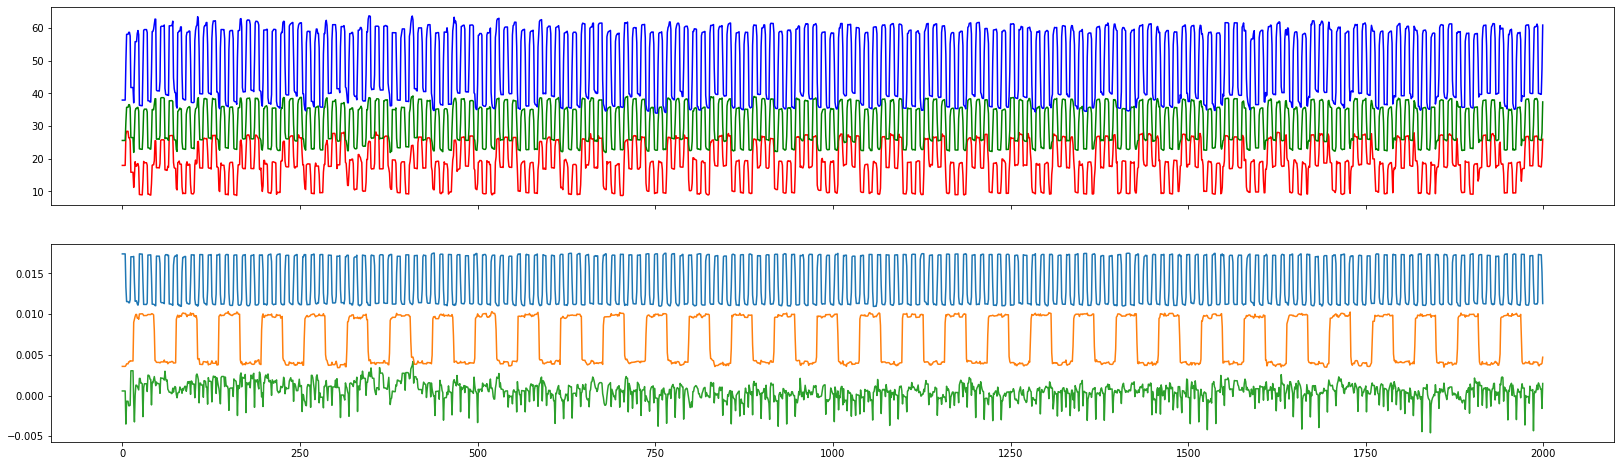

In [ ]:
#apllication of fastICA to separate the mixed signals

nc = 3 #number of components
ica = FastICA(n_components=nc, random_state=0)
#reshape rgb_frames to a 2Darray
X = rgb_frames.reshape(rgb_frames.shape[0], -1).astype(float) 
#extraction of the independent signals 
demixed = ica.fit_transform(X)
#mixing matrix
mix_matrix = ica.mixing_

N = 2000
fig, ax = plt.subplots(2, figsize=(28, 8), sharex=True)
col = ['r', 'g', 'b']
for n in range(3):
    #plot of the original mixed signals
    ax[0].plot((rgb_frames[:N,:,:,n].astype(float)*hv_mask).mean(axis=1).mean(axis=1)+10*n, c=col[n])
    #plot of the indepedent signals extracted by FastICA
    ax[1].plot(demixed[:N,n]+0.007*n, c=f'C{2-n}')

# fig, ax = plt.subplots(nc, figsize=(28, 8), sharey=True, sharex=True)
# for n in range(nc):
#     ax[n].plot(demixed[:2000,n], c=f'C{2-n}')

In [ ]:
print(X)

[[  0.   0.   0. ... 130.  11.  68.]
 [  0.   0.   0. ... 130.  11.  68.]
 [  0.   0.   0. ... 130.  11.  68.]
 ...
 [115. 255.  13. ... 101.  60.  68.]
 [115. 255.  13. ... 101.  60.  68.]
 [115. 255.  13. ... 103.  66.  70.]]


## YUV frames

In [ ]:
nc = 3
ica = FastICA(n_components=nc, random_state=0)
X = yuv_frames.reshape(yuv_frames.shape[0], -1).astype(float)
demixed = ica.fit_transform(X)
mix_matrix = ica.mixing_

N = 2000
fig, ax = plt.subplots(2, figsize=(28, 8), sharex=True)
col = ['r', 'g', 'b']
for n in range(3):
    ax[0].plot((yuv_frames[:N,:,:,n].astype(float)).mean(axis=1).mean(axis=1)+15*n, c=col[n])
    ax[1].plot(demixed[:N,n]+0.01*n, c=f'C{2-n}')

NameError: name 'yuv_frames' is not defined

## HSV Frames## HSV Frames

/home/genzel/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


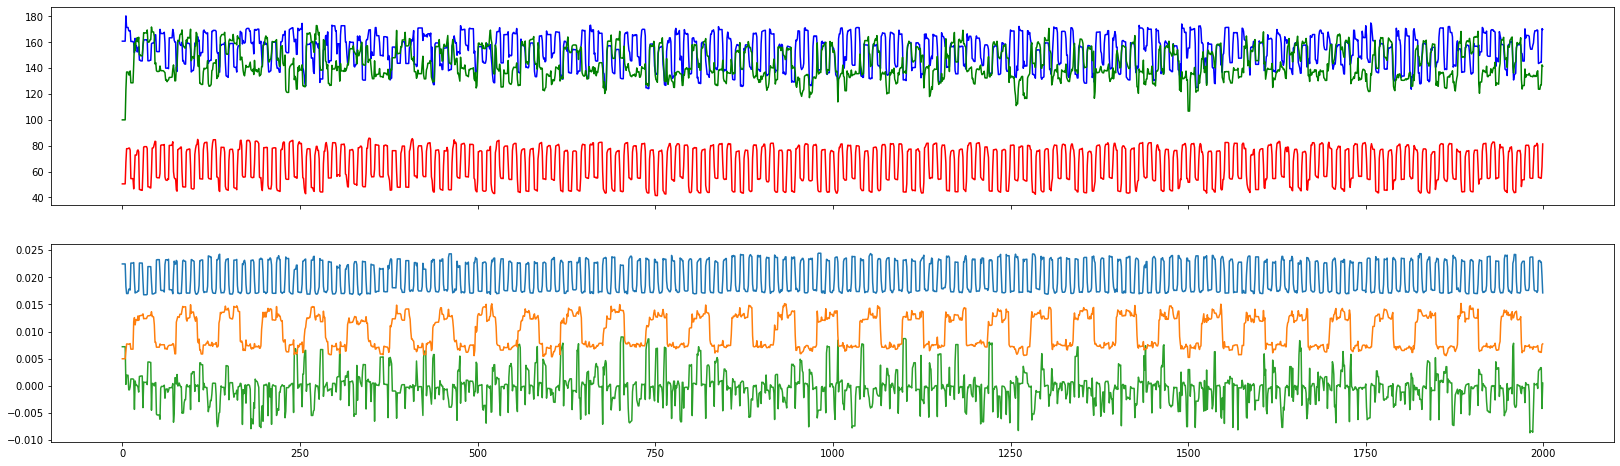

In [ ]:
nc = 3 #number of componentes
ica = FastICA(n_components=nc, random_state=0)

#reshaping of the HSV frames into a 2D array where each row represents a flattened frame and each column represetns a pixel value.
X = hsv_frames.reshape(hsv_frames.shape[0], -1).astype(float) 

#FastICA algorithm is applied to obtain the demixed components as well as obtaining the mixing matrix used by the FastICA algorithm
demixed = ica.fit_transform(X)
mix_matrix = ica.mixing_

#number of frames to plot
N = 2000
fig, ax = plt.subplots(2, figsize=(28, 8), sharex=True)
col = ['r', 'g', 'b']


for n in range(3):
  #for each component plot the mean pixel values of the first n frames along the y'axis and the frame index along the x'axis.
    ax[0].plot((hsv_frames[:N,:,:,n].astype(float)).mean(axis=1).mean(axis=1)+25*(2-n), c=col[2-n])
  #for deach component plot the demixed values of the first N frames alng the y'axis
    ax[1].plot(demixed[:N,n]+0.01*n, c=f'C{2-n}')

# Signal Identity
Kmeans clustering of the the ICA extracted sources for state separation and compare with the expected properties of our signals.

Note the polarity of the ICA signal/kmeans cluster identity signal may be reversed, so we need to check the mixing weights and locations of the cluster centers to restore polarity correctly.

D=75.59%, f=3.24 Hz
flip! [[ 0.0028756 ]
 [-0.00276181]]
D=48.99%, f=0.51 Hz
flip! [[ 0.00323305]
 [-0.00251303]]
D=43.73%, f=2.48 Hz
Expected D=50.0%, f_red=0.5 Hz, f_blue=2.5 Hz


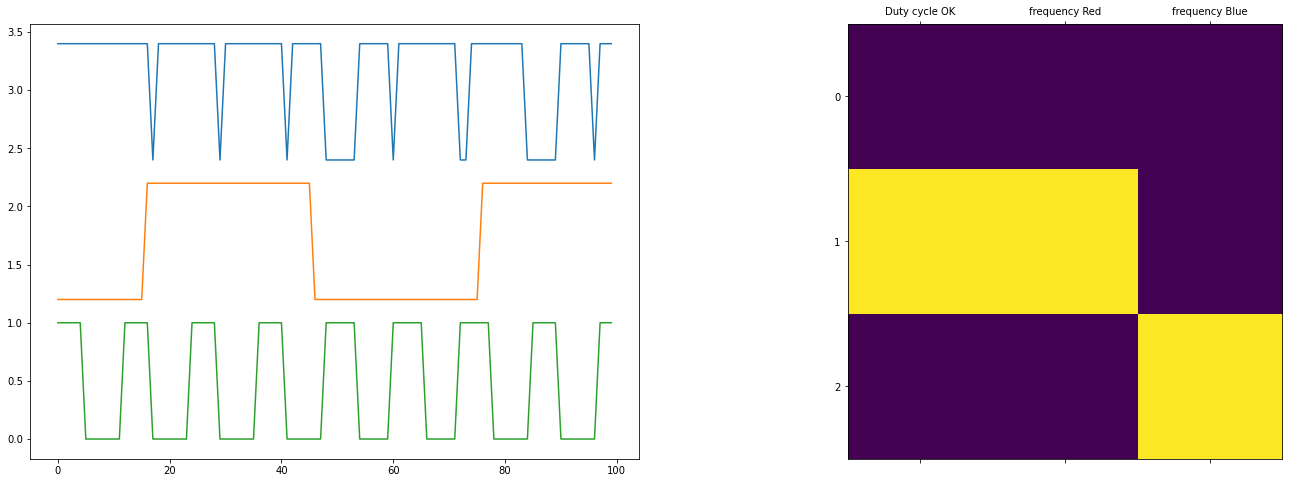

In [ ]:
eD = 0.5
dD = np.zeros(demixed.shape[1])  # distance to expected Duty cycle of 0.5
ef_red = 0.5
df_red = np.zeros(demixed.shape[1])  # distance to expected frequency of 0.5 Hz
ef_blue = 2.5
df_blue = np.zeros(demixed.shape[1])  # distance to expected frequency of 2.5 Hz

fig, ax = plt.subplots(1, 2, figsize=(24, 8))

kmeans = []

#for each component fit a KMeans model with 2 clusters to the demixed component value
for n in range(demixed.shape[1]):
    km = KMeans(n_clusters=2, random_state=0).fit(demixed[:, n].reshape(-1, 1))
    y_km = km.predict(demixed[:, n].reshape(-1, 1)) #obtain the cluster assignments for each value 
    kmeans.append(y_km)
    centers = km.cluster_centers_ #obtaine the centers of the two clusters
    
    # check center location, flip polarity if necessary to match pulse polarity
    if centers[0] > centers[1]:
        print('flip!', centers)
        y_km = np.abs(y_km-1)

    ax[0].plot(y_km[:100]+1.2*(2-n))
    
    #compute the duty cycle as the proportion of frames in which the pulse is "on"
    duty_cycle = y_km.sum()/len(y_km)

    freq = (np.diff(y_km)>0).sum()/len(y_km) * 30
    dD[n] = abs(eD-duty_cycle) #store the absolute difference between the duty cycle and the expected duty cycle
    df_red[n] = abs(ef_red - freq) #store the absolute difference between the frequency f the red pulse and the expected frequency
    df_blue[n] = abs(ef_blue - freq) #store the absolute difference between the frequency of the blue pulse and the expected frequency
    print(f'D={duty_cycle*100:.2f}%, f={freq:.2f} Hz')
ax[1].matshow(np.c_[dD<eD/10, df_red<ef_red/10, df_blue<ef_blue/10])
ax[1].set_xticks(range(3))
ax[1].set_xticklabels(['Duty cycle OK', 'frequency Red', 'frequency Blue'])
print(f'Expected D={eD*100}%, f_red={ef_red} Hz, f_blue={ef_blue} Hz')

# Compute for all eyes

  0%|          | 0/12 [00:00<?, ?it/s]

--- eye01_2020-11-09_12-34-18.mp4 ---


/home/genzel/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


3
ICA Mix: [  5.12958462 923.7626332  377.5303312 ]
Centers: 13.54, -6.12
Polarity FLIP: True (ICA False, kmeans True)
Flipping!
Signal: None (D=31.13%, f=0.07 Hz)
Centers: -10.85, 8.84
Polarity FLIP: False (ICA False, kmeans False)
Signal: blue (D=55.10%, f=2.48 Hz)
Centers: -10.08, 9.79
Polarity FLIP: False (ICA False, kmeans False)
Signal: red (D=50.73%, f=0.50 Hz)
--- eye02_2020-11-09_12-34-18.mp4 ---


/home/genzel/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


3
ICA Mix: [-22.21938048 435.03625001 871.59721116]
Centers: -24.05, 2.48
Polarity FLIP: True (ICA True, kmeans False)
Signal: None (D=90.69%, f=2.49 Hz)
Centers: -10.08, 9.83
Polarity FLIP: False (ICA False, kmeans False)
Signal: red (D=50.65%, f=0.50 Hz)
Centers: -10.59, 9.13
Polarity FLIP: False (ICA False, kmeans False)
Signal: blue (D=53.72%, f=2.48 Hz)
--- eye03_2020-11-09_12-34-18.mp4 ---


/home/genzel/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


3
ICA Mix: [ -88.5315769  -884.82775801 -422.92637045]
Centers: -8.13, 8.69
Polarity FLIP: True (ICA True, kmeans False)
Signal: None (D=48.34%, f=2.76 Hz)
Centers: 9.14, -10.67
Polarity FLIP: False (ICA True, kmeans True)
Flipping!
Signal: blue (D=53.87%, f=2.48 Hz)
Centers: -10.03, 9.87
Polarity FLIP: True (ICA True, kmeans False)
Signal: red (D=50.41%, f=0.50 Hz)
--- eye04_2020-11-09_12-34-18.mp4 ---


/home/genzel/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


3
ICA Mix: [-65.64715825 371.48276627 904.47085703]
Centers: 11.16, -6.96
Polarity FLIP: False (ICA True, kmeans True)
Flipping!
Signal: None (D=38.38%, f=0.47 Hz)
Centers: -10.05, 9.87
Polarity FLIP: False (ICA False, kmeans False)
Signal: red (D=50.44%, f=0.50 Hz)
Centers: -10.65, 9.15
Polarity FLIP: False (ICA False, kmeans False)
Signal: blue (D=53.80%, f=2.48 Hz)
--- eye05_2020-11-09_12-34-18.mp4 ---


/home/genzel/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


3
ICA Mix: [ 134.13796265 -329.45076176 -485.85039681]
Centers: 0.32, -249.65
Polarity FLIP: True (ICA False, kmeans True)
Flipping!
Signal: None (D=99.87%, f=0.00 Hz)
Centers: -10.04, 9.83
Polarity FLIP: True (ICA True, kmeans False)
Signal: red (D=50.53%, f=0.50 Hz)
Centers: -10.76, 9.04
Polarity FLIP: True (ICA True, kmeans False)
Signal: blue (D=54.36%, f=2.48 Hz)
--- eye06_2020-11-09_12-34-18.mp4 ---


/home/genzel/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


3
ICA Mix: [ 139.31897533   11.78965434 -265.76134957]
Centers: 0.41, -155.52
Polarity FLIP: True (ICA False, kmeans True)
Flipping!
Signal: None (D=99.74%, f=0.01 Hz)
Centers: -4.90, 19.87
Polarity FLIP: False (ICA False, kmeans False)
Signal: None (D=19.79%, f=0.00 Hz)
Centers: -10.04, 9.81
Polarity FLIP: True (ICA True, kmeans False)
Signal: red (D=50.58%, f=0.50 Hz)
--- eye07_2020-11-09_12-34-18.mp4 ---


/home/genzel/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


3
ICA Mix: [ -168.8022767   -646.18908758 -1038.63683247]
Centers: 4.24, -12.51
Polarity FLIP: False (ICA True, kmeans True)
Flipping!
Signal: None (D=74.80%, f=2.30 Hz)
Centers: -10.11, 9.74
Polarity FLIP: True (ICA True, kmeans False)
Signal: red (D=50.93%, f=0.50 Hz)
Centers: -11.26, 8.58
Polarity FLIP: True (ICA True, kmeans False)
Signal: blue (D=56.75%, f=2.48 Hz)
--- eye08_2020-11-09_12-34-18.mp4 ---


/home/genzel/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


3
ICA Mix: [  -13.27121346 -1152.39896996  -859.67118923]
Centers: 2.50, -32.91
Polarity FLIP: False (ICA True, kmeans True)
Flipping!
Signal: None (D=92.94%, f=2.12 Hz)
Centers: -10.92, 8.89
Polarity FLIP: True (ICA True, kmeans False)
Signal: blue (D=55.14%, f=2.48 Hz)
Centers: -10.07, 9.83
Polarity FLIP: True (ICA True, kmeans False)
Signal: red (D=50.60%, f=0.50 Hz)
--- eye09_2020-11-09_12-34-18.mp4 ---


/home/genzel/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


3
ICA Mix: [927.29939143 470.4795573   11.24762063]
Centers: -10.84, 9.02
Polarity FLIP: False (ICA False, kmeans False)
Signal: blue (D=54.58%, f=2.48 Hz)
Centers: -10.07, 9.83
Polarity FLIP: False (ICA False, kmeans False)
Signal: red (D=50.59%, f=0.50 Hz)
Centers: 8.00, -7.57
Polarity FLIP: True (ICA False, kmeans True)
Flipping!
Signal: None (D=48.60%, f=2.99 Hz)
--- eye10_2020-11-09_12-34-18.mp4 ---


/home/genzel/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


3
ICA Mix: [-19.14042963 437.73104565 971.54062709]
Centers: -2.24, 34.88
Polarity FLIP: True (ICA True, kmeans False)
Signal: None (D=6.04%, f=1.79 Hz)
Centers: -10.04, 9.89
Polarity FLIP: False (ICA False, kmeans False)
Signal: red (D=50.39%, f=0.50 Hz)
Centers: -10.46, 9.32
Polarity FLIP: False (ICA False, kmeans False)
Signal: blue (D=52.88%, f=2.48 Hz)
--- eye11_2020-11-09_12-34-18.mp4 ---


/home/genzel/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


3
ICA Mix: [ 492.98557393 -239.31114924   17.89254771]
Centers: -10.15, 9.60
Polarity FLIP: False (ICA False, kmeans False)
Signal: blue (D=51.40%, f=2.48 Hz)
Centers: -9.89, 9.82
Polarity FLIP: True (ICA True, kmeans False)
Signal: red (D=50.17%, f=0.50 Hz)
Centers: -3.30, 17.23
Polarity FLIP: False (ICA False, kmeans False)
Signal: None (D=16.11%, f=2.00 Hz)
--- eye12_2020-11-09_12-34-18.mp4 ---


/home/genzel/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


3
ICA Mix: [ -43.65646599 -169.48116731  560.8364623 ]
Centers: 2.82, -29.48
Polarity FLIP: False (ICA True, kmeans True)
Flipping!
Signal: None (D=91.27%, f=2.59 Hz)
Centers: -9.94, 9.95
Polarity FLIP: True (ICA True, kmeans False)
Signal: red (D=49.97%, f=0.50 Hz)
Centers: -10.47, 9.23
Polarity FLIP: False (ICA False, kmeans False)
Signal: blue (D=53.18%, f=2.48 Hz)


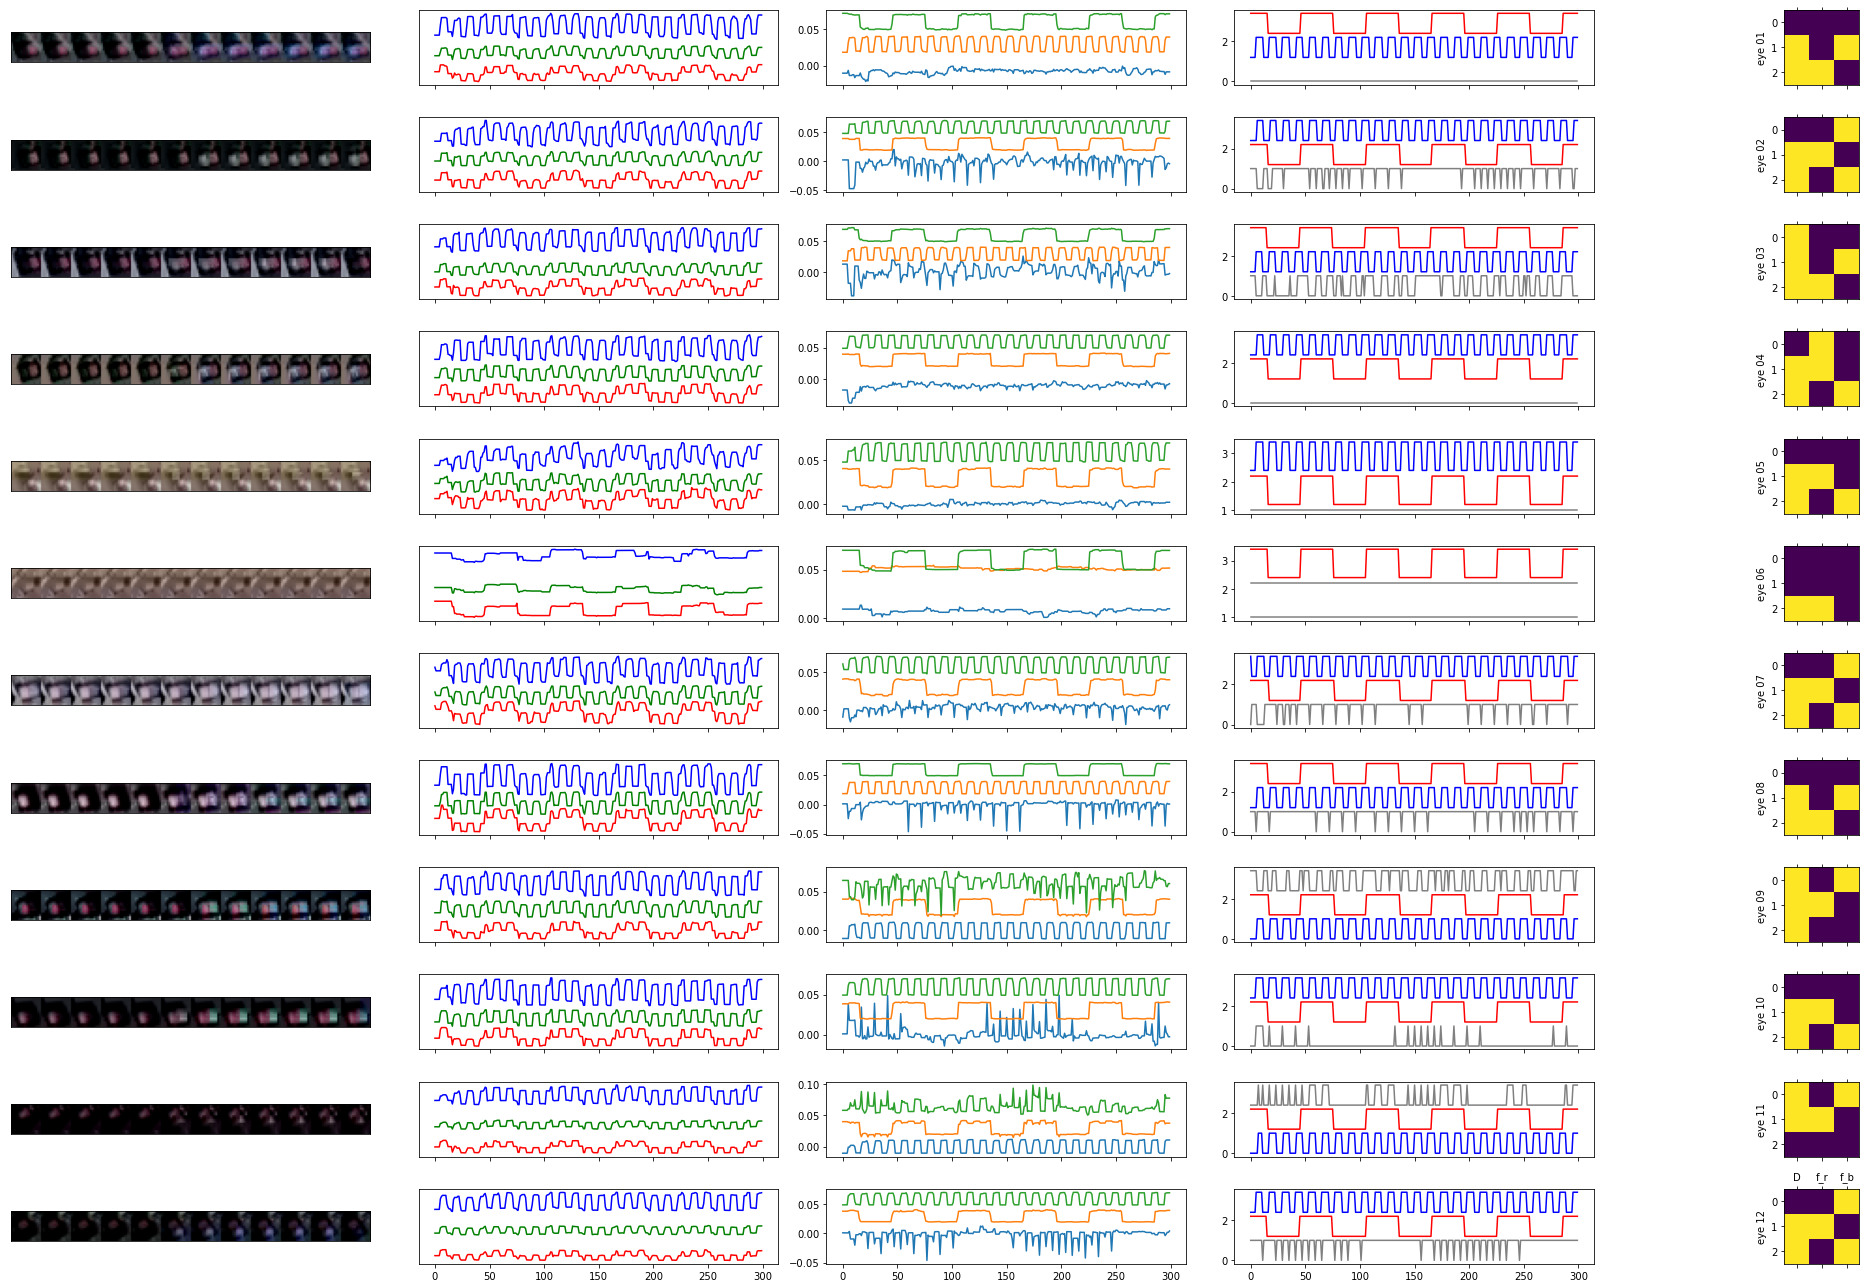

In [ ]:
n_im = 12
    
# properties of our signals
fps = 30
eD = 0.5       # expected Duty cycle of 0.5
ef_red = 0.5   # expected frequency of 0.5 Hz
ef_blue = 2.5  # expected frequency of 2.5 Hz

colors = {0: 'red', 1: 'blue', None: 'gray'}
N = 300
N_ICA = 10000  # numbers of samples to use for ICA, -1 for all

led_signals = np.zeros([rgb_frames.shape[0], 2], dtype=np.double)
fig, ax = plt.subplots(12, 5, figsize=(28, 18), sharex="col") ##  sharey=True
for eye in tnrange(12):
    print(f'--- {videos[eye].name} ---')
    
    rgb_frames = np.fromfile(videos[eye].with_suffix('.rgb'), dtype=np.uint8).reshape(-1, 16, 16, 3)
    for n, c in enumerate(['r', 'g', 'b']):
        ax[eye, 1].plot(rgb_frames[:N,:,:,n].astype(float).mean(axis=1).mean(axis=1)+30*n, c=c)
        ax[eye, 1].axes.yaxis.set_visible(False)
    
    # ICA to extract blinking signals from noise/variation
    num_components = 3
    ica = FastICA(n_components=num_components, random_state=0)
    demixed = ica.fit_transform(rgb_frames.reshape(rgb_frames.shape[0], -1).astype(float)[:N_ICA, :])
    mix_weights = ica.mixing_.mean(axis=0)
    
    dD = np.zeros(demixed.shape[1])
    df_red = np.zeros(demixed.shape[1])
    df_blue = np.zeros(demixed.shape[1])
    print(len(df_red))
    print(f'ICA Mix: {mix_weights}')
    
    for n in range(demixed.shape[1]):
        # Check the mixing weights if the demixed signal polarity is reversed
        # (negative weights for ROI. Assuming rest of pixel array has weight zero, mean weight tells us sign.)
        flip_ica = mix_weights[n] < 0
        if flip_ica:
            demixed[:, n] = -demixed[:, n]

        km = KMeans(n_clusters=2, random_state=0).fit(demixed[:, n].reshape(-1, 1))
        y_km = km.predict(demixed[:, n].reshape(-1, 1))

        # check polarity, if necessary flip to match pulse polarity
        print(f'Centers: {float(km.cluster_centers_[0]*1000):.2f}, {float(km.cluster_centers_[1]*1000):.2f}')
        centers = km.cluster_centers_.ravel()

        flip_kmeans = centers[0] > centers[1]
        flip = flip_ica ^ flip_kmeans
        print(f'Polarity FLIP: {flip} (ICA {flip_ica}, kmeans {flip_kmeans})')
        if flip_kmeans:
            print('Flipping!')
            y_km = np.abs(y_km-1)

        duty_cycle = y_km.sum()/len(y_km)
        freq = (np.diff(y_km)>0).sum()/len(y_km) * fps
        dD[n] = abs(eD-duty_cycle)
        df_red[n] = abs(ef_red - freq)
        df_blue[n] = abs(ef_blue - freq)
        
        # Attempt to identify the ICA signal as a color LED
        good_DC = dD[n] < 0.2 * eD
        good_freq = np.array([df_red[n] < ef_red * 0.1, df_blue[n] < ef_blue * 0.1])
        is_signal = good_DC and good_freq.sum()
        signal_color = good_freq.argmax() if is_signal else None
        
        sig_col = colors[signal_color]
        sig_name = 'None' if signal_color is None else colors[signal_color]
        print(f'Signal: {sig_name} (D={duty_cycle*100:.2f}%, f={freq:.2f} Hz)')
        ax[eye, 3].plot(y_km[:N]+1.2*n, c=sig_col)
        
        
        
        
        if signal_color is not None:
            lim = min(len(y_km), len(led_signals))
            led_signals[:lim, signal_color] += y_km[:lim]

        
    candidates = np.c_[dD < 0.2 * eD, df_red < ef_red * 0.1, df_blue < ef_blue * 0.1]
#     is_signal = np.logical_and(candidates[:, 0], np.sum(candidates[:, 1:]))
#     signal_color = [np.argmax(candidates[ns, 1:]) if is_signal[ns] else None for ns in range(candidates.shape[0])]
    ax[eye, 4].matshow(candidates)
    ax[eye, 4].set_xticks([0, 1, 2])
    ax[eye, 4].set_xticklabels(['D', 'f_r', 'f_b'])
    ax[eye, 4].set_ylabel(f'eye {eye+1:02d}')

    # Attempt to identify the ICA signal as a color LED
#     is_signal = np.logical_and(candidates[:, 0], np.sum(candidates[:, 1:]))
#     signal_color = [np.argmax(candidates[ns, 1:]) if is_signal[ns] else None for ns in range(candidates.shape[0])]
    
    rgb_arr = np.zeros((rgb_frames.shape[1], rgb_frames.shape[2]*n_im, 3), dtype=np.uint8)
    for n in range(n_im):
        rgb_arr[:,16*n:16*(n+1), :] = rgb_frames[n,:,:,:]

    ax[eye, 0].imshow(rgb_arr)
    ax[eye, 0].axes.xaxis.set_visible(False)
    ax[eye, 0].axes.yaxis.set_visible(False)
    ax[eye, 0].set_ylabel(f'eye {eye+1:02d}')

    for nc in range(num_components):
        ax[eye, 2].plot(demixed[:N,nc]+0.03*nc, c=f'C{nc:02d}')
    
#     break
plt.tight_layout()
plt.savefig('fig1.png')

In [ ]:
basepath = Path('/media/genzel/Data/Files/Time_stamps_from_metadata').resolve()
# basepath = Path('2021-03-12_09-44-08/').resolve()
time_stamps = list(sorted(basepath.glob('eye*.csv')))
print(time_stamps)
# df_timestamps = np.zeros()
# for i in range(len(time_stamps)):
   

[PosixPath('/media/genzel/Data/Files/Time_stamps_from_metadata/eye01_2020-11-09_12-34-18.csv'), PosixPath('/media/genzel/Data/Files/Time_stamps_from_metadata/eye02_2020-11-09_12-34-18.csv'), PosixPath('/media/genzel/Data/Files/Time_stamps_from_metadata/eye03_2020-11-09_12-34-18.csv'), PosixPath('/media/genzel/Data/Files/Time_stamps_from_metadata/eye04_2020-11-09_12-34-18.csv'), PosixPath('/media/genzel/Data/Files/Time_stamps_from_metadata/eye05_2020-11-09_12-34-18.csv'), PosixPath('/media/genzel/Data/Files/Time_stamps_from_metadata/eye06_2020-11-09_12-34-18.csv'), PosixPath('/media/genzel/Data/Files/Time_stamps_from_metadata/eye07_2020-11-09_12-34-18.csv'), PosixPath('/media/genzel/Data/Files/Time_stamps_from_metadata/eye08_2020-11-09_12-34-18.csv'), PosixPath('/media/genzel/Data/Files/Time_stamps_from_metadata/eye09_2020-11-09_12-34-18.csv'), PosixPath('/media/genzel/Data/Files/Time_stamps_from_metadata/eye10_2020-11-09_12-34-18.csv'), PosixPath('/media/genzel/Data/Files/Time_stamps_f

  0%|          | 0/12 [00:00<?, ?it/s]

/home/genzel/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


0


/home/genzel/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


1


/home/genzel/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


2


/home/genzel/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


3


/home/genzel/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


4


/home/genzel/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


5


/home/genzel/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


6


/home/genzel/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


7


/home/genzel/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


8


/home/genzel/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


9


/home/genzel/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


10


/home/genzel/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


11


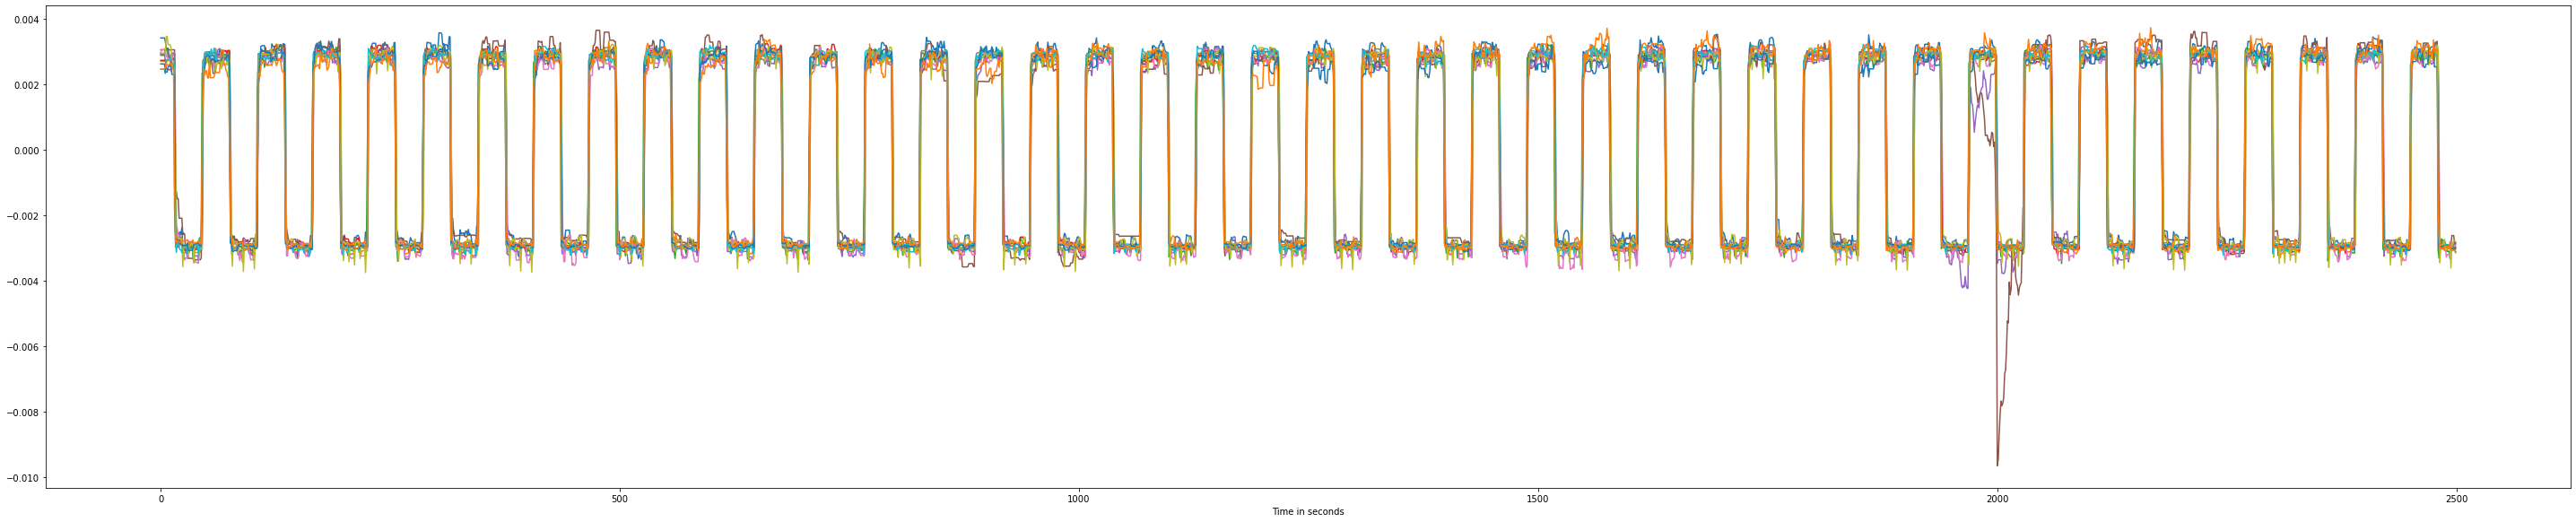

In [ ]:
n_im = 12
import pandas
import functools as ft
var_holder = {}
# properties of our signals
fps = 30
eD = 0.5       # expected Duty cycle of 0.5
ef_red = 0.5   # expected frequency of 0.5 Hz
ef_blue = 2.5  # expected frequency of 2.5 Hz



colors = {0: 'red', 1: 'blue', None: 'gray'}
N = 2500
N_ICA = -1  # numbers of samples to use for ICA, -1 for all

led_signals = np.zeros([rgb_frames.shape[0], 2], dtype=np.double)
# fig, ax = plt.subplots(12, 5, figsize=(28, 18), sharex="col") ##  sharey=True
fig, ax = plt.subplots(1, figsize=(40, 8), sharex="col", sharey=True )
first = 0
for eye in tnrange(12):
    # print(f'--- {videos[eye].name} ---')
    # print(eye)
    rgb_frames = np.fromfile(videos[eye].with_suffix('.rgb'), dtype=np.uint8).reshape(-1, 16, 16, 3)
    # for n, c in enumerate(['r', 'g', 'b']):
        # ax[eye, 1].plot(rgb_frames[:N,:,:,n].astype(float).mean(axis=1).mean(axis=1)+30*n, c=c)
        # ax[eye, 1].axes.yaxis.set_visible(False)
    
    # ICA to extract blinking signals from noise/variation
    num_components = 3
    ica = FastICA(n_components=num_components, random_state=0)
    demixed = ica.fit_transform(rgb_frames.reshape(rgb_frames.shape[0], -1).astype(float)[:N_ICA, :])
    mix_weights = ica.mixing_.mean(axis=0)
    
    dD = np.zeros(demixed.shape[1])
    df_red = np.zeros(demixed.shape[1])
    df_blue = np.zeros(demixed.shape[1])
    # print(len(df_red))
    # print(f'ICA Mix: {mix_weights}')
    # print(np.shape(df_red))
    df_red_vs_time = pandas.DataFrame({'key' : [], 'r' : []})

    data = np.genfromtxt(time_stamps[eye], delimiter=',', names=True)
    time_meta = data['Timestamps_M']
    for n in range(demixed.shape[1]):

        # Check the mixing weights if the demixed signal polarity is reversed
        # (negative weights for ROI. Assuming rest of pixel array has weight zero, mean weight tells us sign.)
        flip_ica = mix_weights[n] < 0
        if flip_ica:
            demixed[:, n] = -demixed[:, n]

        km = KMeans(n_clusters=2, random_state=0).fit(demixed[:, n].reshape(-1, 1))
        y_km = km.predict(demixed[:, n].reshape(-1, 1))

        # check polarity, if necessary flip to match pulse polarity
        # print(f'Centers: {float(km.cluster_centers_[0]*1000):.2f}, {float(km.cluster_centers_[1]*1000):.2f}')
        centers = km.cluster_centers_.ravel()

        flip_kmeans = centers[0] > centers[1]
        flip = flip_ica ^ flip_kmeans
        # print(f'Polarity FLIP: {flip} (ICA {flip_ica}, kmeans {flip_kmeans})')
        if flip_kmeans:
            # print('Flipping!')
            y_km = np.abs(y_km-1)

        duty_cycle = y_km.sum()/len(y_km)
        freq = (np.diff(y_km)>0).sum()/len(y_km) * fps
        dD[n] = abs(eD-duty_cycle)
        df_red[n] = abs(ef_red - freq)
        df_blue[n] = abs(ef_blue - freq)
        
        # Attempt to identify the ICA signal as a color LED
        good_DC = dD[n] < 0.2 * eD
        good_freq = np.array([df_red[n] < ef_red * 0.1, df_blue[n] < ef_blue * 0.1])
        is_signal = good_DC and good_freq.sum()
        signal_color = good_freq.argmax() if is_signal else None
        
        sig_col = colors[signal_color]
        sig_name = 'None' if signal_color is None else colors[signal_color]
        # print(f'Signal: {sig_name} (D={duty_cycle*100:.2f}%, f={freq:.2f} Hz)')
        # ax[eye, 3].plot(y_km[:N]+1.2*n, c=sig_col)
        # print(sig_name)
        # print(i)
        
        if sig_col=='red':
            a = y_km[:N]
#             if eye==0:
#                 # print(sig_col)
#                 # print(np.shape(a))
#                 # print(a)
#                 # ax.plot(a)
#                 # print(n)
#                 df_red_vs_time['key'] = time_meta[1:-1]
#                 df_red_vs_time['r'] = demixed[:N, n]
#                 # print(df_red_vs_time)

#                 # print(df_red_vs_time.head())

#             else:
            df_temp = pandas.DataFrame({'key' : [], "Red_LED_Intensity_%s" %(eye) : []})
            # "Red_LED_Intensity_%s" %(eye)
            df_temp['key'] = time_meta[0:len(demixed[:N, n])]
            df_temp["Red_LED_Intensity_%s" %(eye)] = demixed[:N, n]
            # print(df_temp.head())
            # df_red_vs_time.join(df_temp, lsuffix='_caller', rsuffix='_other')
            # print(df_red_vs_time.head())
            # df_red_vs_time.join(df_temp.set_index('key'), on='key')
            # a = pandas.merge_ordered(df_red_vs_time, df_temp, fill_method="None", left_on='key', how='outer')
            # df_red_vs_time = pandas.merge(df_red_vs_time, df_temp, on='key', how='outer')
            ax.plot(demixed[:N, n])
            print(eye)
            if eye==0:
                df0 = df_temp
            elif eye==1:
                df1 = df_temp
            elif eye==2:
                df2 = df_temp
            elif eye==3:
                df3 = df_temp
            elif eye==4:
                df4 = df_temp
            elif eye==5:
                df5 = df_temp
            elif eye==6:
                df6 = df_temp
            elif eye==7:
                df7 = df_temp
            elif eye==8:
                df8 = df_temp
            elif eye==9:
                df9 = df_temp
            elif eye==10:
                df10 = df_temp
            elif eye==11:
                df11 = df_temp
                
                
            # df_red_vs_time['Time_in_seconds'] = time_meta[1:-1]
            # df_red_vs_time['Red_LED_Intensity'] = demixed[:N, n]
            
            # print(np.shape(demixed[:N, n]))
            # ax.plot(time_meta[1:-1], demixed[:N, n])
            # print(demixed[:N, n])


# for i in range(12):
#     ax.plot(time_meta[1:-1], demixed[:N, n])



        # print(df_red)
        # print((y_km))
        # ax.plot(df_red[:N])

        # if signal_color is not None:
        #     lim = min(len(y_km), len(led_signals))
        #     led_signals[:lim, signal_color] += y_km[:lim]

            # print(sig_col)

            
          
            

    # print(df_red_vs_time.shape)
    # df_red_vs_time = df_red_vs_time.fillna(0)        
            
    # ax.plot(df_red_vs_time, df_red_vs_time[Red_LED_Intensity_B])
        
    # candidates = np.c_[dD < 0.2 * eD, df_red < ef_red * 0.1, df_blue < ef_blue * 0.1]
#     is_signal = np.logical_and(candidates[:, 0], np.sum(candidates[:, 1:]))
#     signal_color = [np.argmax(candidates[ns, 1:]) if is_signal[ns] else None for ns in range(candidates.shape[0])]
    # ax[eye, 4].matshow(candidates)
    # ax[eye, 4].set_xticks([0, 1, 2])
    # ax[eye, 4].set_xticklabels(['D', 'f_r', 'f_b'])
    # ax[eye, 4].set_ylabel(f'eye {eye+1:02d}')

    # Attempt to identify the ICA signal as a color LED
#     is_signal = np.logical_and(candidates[:, 0], np.sum(candidates[:, 1:]))
#     signal_color = [np.argmax(candidates[ns, 1:]) if is_signal[ns] else None for ns in range(candidates.shape[0])]
    
    # rgb_arr = np.zeros((rgb_frames.shape[1], rgb_frames.shape[2]*n_im, 3), dtype=np.uint8)
    # for n in range(n_im):
    #     rgb_arr[:,16*n:16*(n+1), :] = rgb_frames[n,:,:,:]

    # ax[eye, 0].imshow(rgb_arr)
    # ax[eye, 0].axes.xaxis.set_visible(False)
    # ax[eye, 0].axes.yaxis.set_visible(False)
    # ax[eye, 0].set_ylabel(f'eye {eye+1:02d}')

    # for nc in range(num_components):
        # ax[eye, 2].plot(demixed[:N,nc]+0.03*nc, c=f'C{nc:02d}')
    
#     break
plt.tight_layout()
ax.set_xlabel('Time in seconds')
plt.savefig('ICA_for_each_eye_red_LED_intensity.png');



  0%|          | 0/12 [00:00<?, ?it/s]

/home/genzel/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


0


/home/genzel/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


1


/home/genzel/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


2


/home/genzel/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


3


/home/genzel/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


4


/home/genzel/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


5


/home/genzel/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


6


/home/genzel/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


7


/home/genzel/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


8


/home/genzel/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


9


/home/genzel/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


10


/home/genzel/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


11


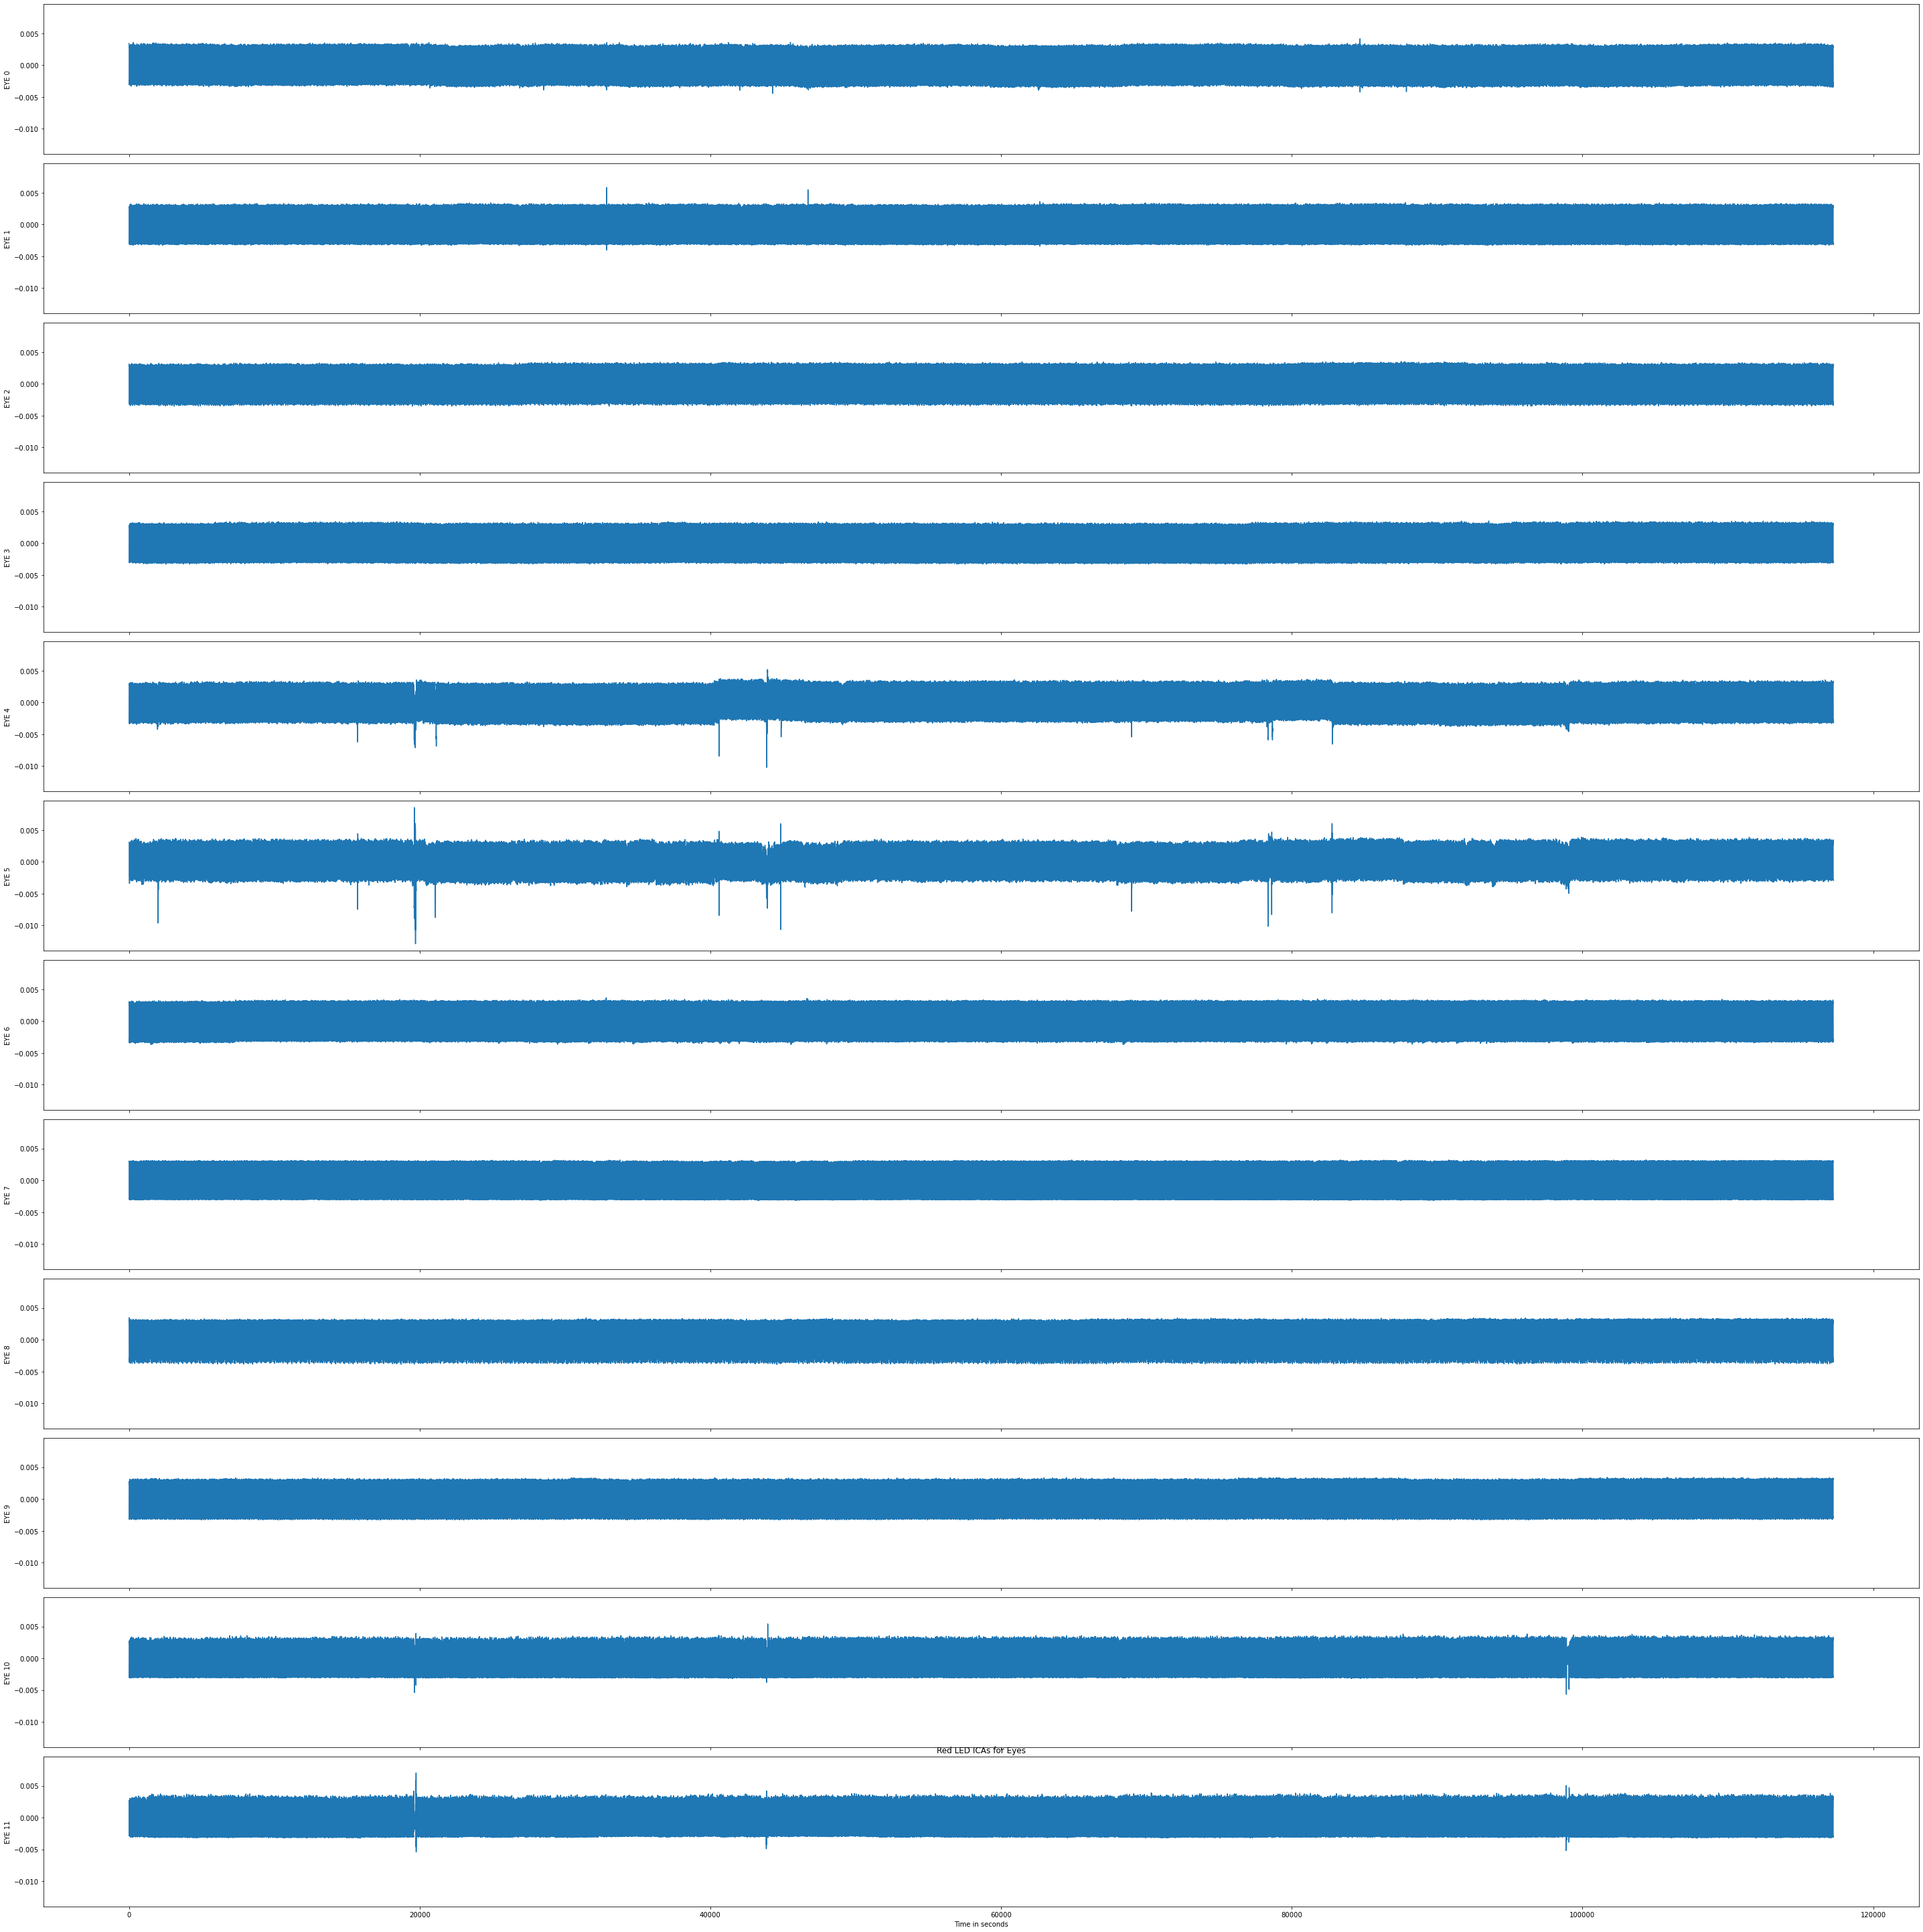

In [ ]:
n_im = 12
import pandas
import functools as ft
var_holder = {}
# properties of our signals
fps = 30
eD = 0.5       # expected Duty cycle of 0.5
ef_red = 0.5   # expected frequency of 0.5 Hz
ef_blue = 2.5  # expected frequency of 2.5 Hz

colors = {0: 'red', 1: 'blue', None: 'gray'}
N = -1
N_ICA = -1  # numbers of samples to use for ICA, -1 for all

led_signals = np.zeros([rgb_frames.shape[0], 2], dtype=np.double)
# fig, ax = plt.subplots(12, 5, figsize=(28, 18), sharex="col") ##  sharey=True
fig, ax = plt.subplots(12,1, figsize=(40, 40), sharex=True, sharey=True )
first = 0
for eye in tnrange(12):
    # print(f'--- {videos[eye].name} ---')
    # print(eye)
    rgb_frames = np.fromfile(videos[eye].with_suffix('.rgb'), dtype=np.uint8).reshape(-1, 16, 16, 3)
    # for n, c in enumerate(['r', 'g', 'b']):
        # ax[eye, 1].plot(rgb_frames[:N,:,:,n].astype(float).mean(axis=1).mean(axis=1)+30*n, c=c)
        # ax[eye, 1].axes.yaxis.set_visible(False)
    
    # ICA to extract blinking signals from noise/variation
    num_components = 3
    ica = FastICA(n_components=num_components, random_state=0)
    demixed = ica.fit_transform(rgb_frames.reshape(rgb_frames.shape[0], -1).astype(float)[:N_ICA, :])
    mix_weights = ica.mixing_.mean(axis=0)
    
    dD = np.zeros(demixed.shape[1])
    df_red = np.zeros(demixed.shape[1])
    df_blue = np.zeros(demixed.shape[1])
    # print(len(df_red))
    # print(f'ICA Mix: {mix_weights}')
    # print(np.shape(df_red))
    df_red_vs_time = pandas.DataFrame({'key' : [], 'r' : []})

    data = np.genfromtxt(time_stamps[eye], delimiter=',', names=True)
    time_meta = data['Timestamps_M']
    for n in range(demixed.shape[1]):

        # Check the mixing weights if the demixed signal polarity is reversed
        # (negative weights for ROI. Assuming rest of pixel array has weight zero, mean weight tells us sign.)
        flip_ica = mix_weights[n] < 0
        if flip_ica:
            demixed[:, n] = -demixed[:, n]

        km = KMeans(n_clusters=2, random_state=0).fit(demixed[:, n].reshape(-1, 1))
        y_km = km.predict(demixed[:, n].reshape(-1, 1))

        # check polarity, if necessary flip to match pulse polarity
        # print(f'Centers: {float(km.cluster_centers_[0]*1000):.2f}, {float(km.cluster_centers_[1]*1000):.2f}')
        centers = km.cluster_centers_.ravel()

        flip_kmeans = centers[0] > centers[1]
        flip = flip_ica ^ flip_kmeans
        # print(f'Polarity FLIP: {flip} (ICA {flip_ica}, kmeans {flip_kmeans})')
        if flip_kmeans:
            # print('Flipping!')
            y_km = np.abs(y_km-1)

        duty_cycle = y_km.sum()/len(y_km)
        freq = (np.diff(y_km)>0).sum()/len(y_km) * fps
        dD[n] = abs(eD-duty_cycle)
        df_red[n] = abs(ef_red - freq)
        df_blue[n] = abs(ef_blue - freq)
        
        # Attempt to identify the ICA signal as a color LED
        good_DC = dD[n] < 0.2 * eD
        good_freq = np.array([df_red[n] < ef_red * 0.1, df_blue[n] < ef_blue * 0.1])
        is_signal = good_DC and good_freq.sum()
        signal_color = good_freq.argmax() if is_signal else None
        
        sig_col = colors[signal_color]
        sig_name = 'None' if signal_color is None else colors[signal_color]

        if sig_col=='red':
            a = y_km[:N]
            df_temp = pandas.DataFrame({'key' : [], "Red_LED_Intensity_%s" %(eye) : []})
            # "Red_LED_Intensity_%s" %(eye)
            df_temp['key'] = time_meta[0:(len(demixed[:N, n]-1))]
            df_temp["Red_LED_Intensity_%s" %(eye)] = demixed[:N, n]
            ax[eye].plot(demixed[:N, n])
            ax[eye].set_ylabel('EYE ' + str(eye))
            print(eye)
            if eye==0:
                df0 = df_temp
            elif eye==1:
                df1 = df_temp
            elif eye==2:
                df2 = df_temp
            elif eye==3:
                df3 = df_temp
            elif eye==4:
                df4 = df_temp
            elif eye==5:
                df5 = df_temp
            elif eye==6:
                df6 = df_temp
            elif eye==7:
                df7 = df_temp
            elif eye==8:
                df8 = df_temp
            elif eye==9:
                df9 = df_temp
            elif eye==10:
                df10 = df_temp
            elif eye==11:
                df11 = df_temp
                
plt.tight_layout()
ax[11].set_xlabel('Time in seconds')
plt.title('Red LED ICAs for Eyes')
plt.savefig('Red_LED_ICAs_for_Eyes.png');

(1405404, 13)


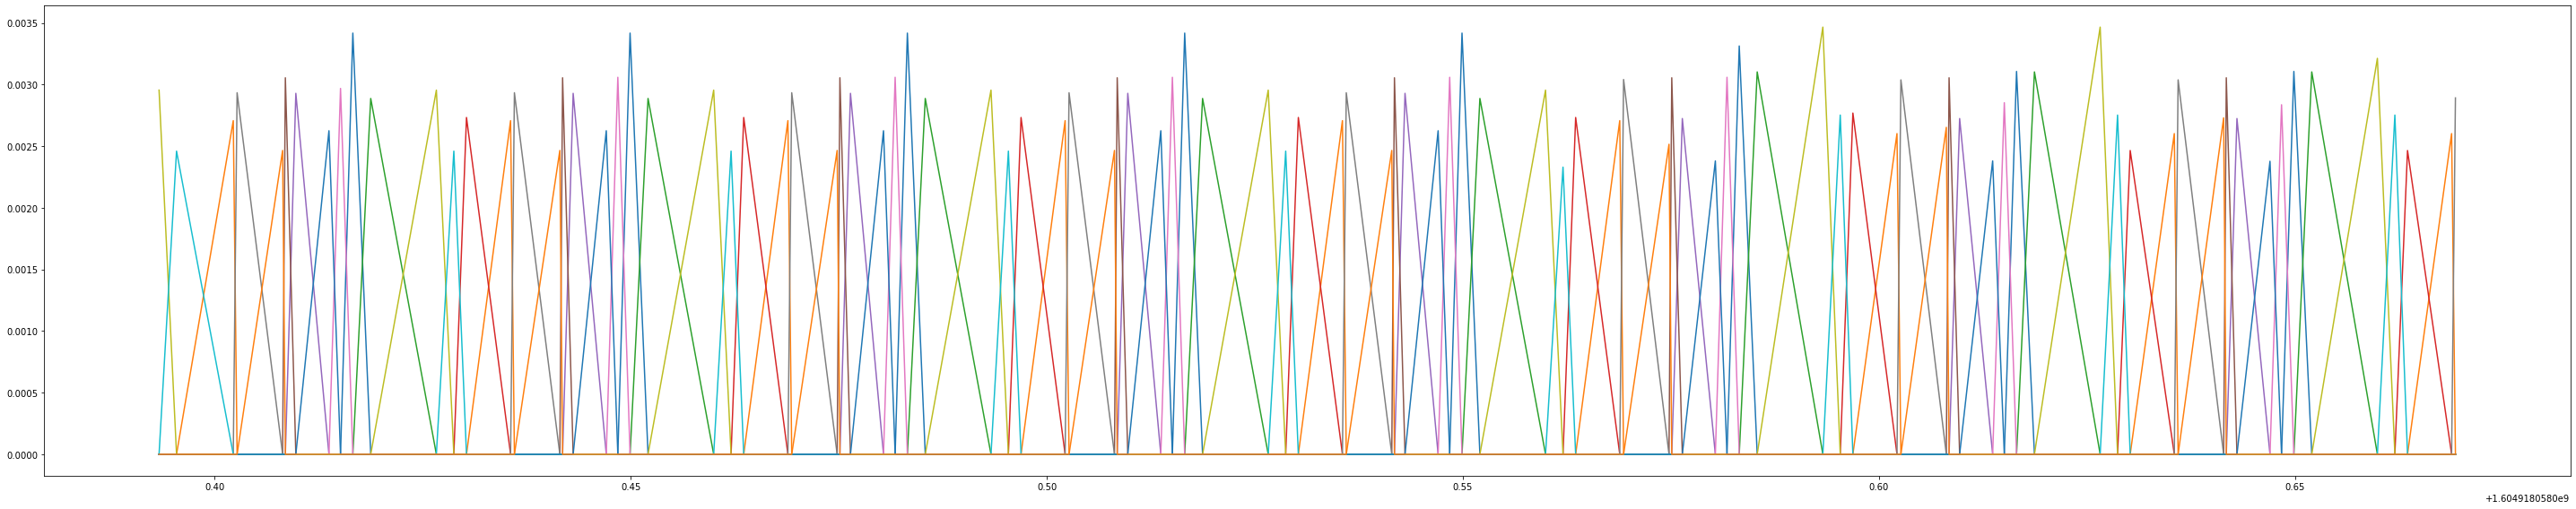

In [ ]:
fig, ax = plt.subplots(1, figsize=(40, 8)) #sharex="col", sharey=True )

dfs = [df0, df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11]        
df_final = ft.reduce(lambda left, right: pd.merge(left, right, on='key', how='outer', suffixes=(None, None)), dfs)  
df_final = df_final.sort_values('key')
df_final = df_final.fillna(0)
width = -1
# print(df_final.head(n=100))
print(df_final.shape)
# df_total = 0
for eye in range(12):
    ax.plot(df_final['key'][:100], df_final["Red_LED_Intensity_%s" %(eye)][:100])
    # df_total = df_total + df_final["Red_LED_Intensity_%s" %(eye)]
# ax.set_xlim([df_final['key'][0], df_final['key'][width]])
plt.tight_layout()  

(1405404, 13)


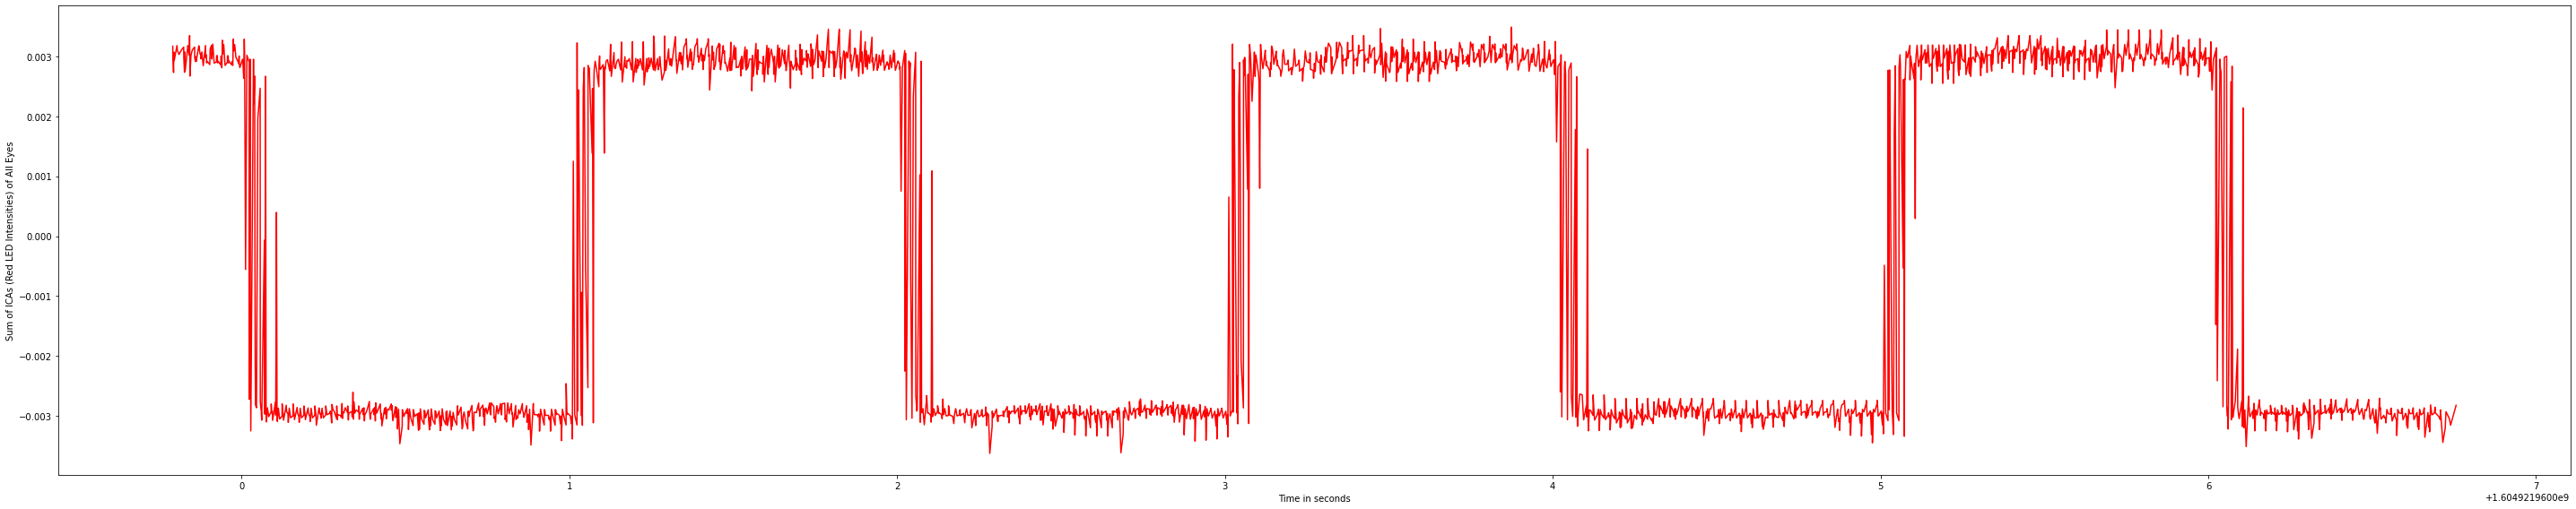

In [ ]:
fig, ax = plt.subplots(1, figsize=(40, 8)) #sharex="col", sharey=True )
dfs = [df0, df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11]        
df_final = ft.reduce(lambda left, right: pd.merge(left, right, on='key', how='outer', suffixes=(None, None)), dfs)  
df_final = df_final.sort_values('key')
df_final = df_final.fillna(0)
width = -1
# print(df_final.head(n=100))
print(df_final.shape)
df_total = 0
for eye in range(12):
    # ax.plot(df_final['key'][:100], df_final["Red_LED_Intensity_%s" %(eye)][:100])
    df_total = df_total + df_final["Red_LED_Intensity_%s" %(eye)]
ax.plot(df_final['key'][-2500:-1], df_total[-2500:-1], c='r')
ax.set_xlabel('Time in seconds')
ax.set_ylabel('Sum of ICAs (Red LED Intensities) of All Eyes')
# ax.set_xlim([df_final['key'][0], df_final['key'][width]])
plt.tight_layout()
plt.savefig('sum_of_ICAs_red_LED_intensity.png');

In [ ]:
# ?pd.DataFrame.interpolate

In [ ]:
df0

,key,Red_LED_Intensity_0
0,1.604918e+09,0.003418
1,1.604918e+09,0.003418
2,1.604918e+09,0.003418
3,1.604918e+09,0.003418
4,1.604918e+09,0.003418
...,...,...
117266,1.604922e+09,-0.003330
117267,1.604922e+09,-0.003207
117268,1.604922e+09,-0.003229
117269,1.604922e+09,-0.003268


In [ ]:
df_final.head()

,key,Red_LED_Intensity_0,Red_LED_Intensity_1,Red_LED_Intensity_2,Red_LED_Intensity_3,Red_LED_Intensity_4,Red_LED_Intensity_5,Red_LED_Intensity_6,Red_LED_Intensity_7,Red_LED_Intensity_8,Red_LED_Intensity_9,Red_LED_Intensity_10,Red_LED_Intensity_11
937304,1.604918e+09,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.002955,0.00000,0.0,0.000000
1054338,1.604918e+09,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00246,0.0,0.000000
117271,1.604918e+09,0.0,0.002708,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.000000
820437,1.604918e+09,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.002934,0.000000,0.00000,0.0,0.000000
1288301,1.604918e+09,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.002466


In [ ]:
df_total.shape

(1405404,)

(1405404, 13)


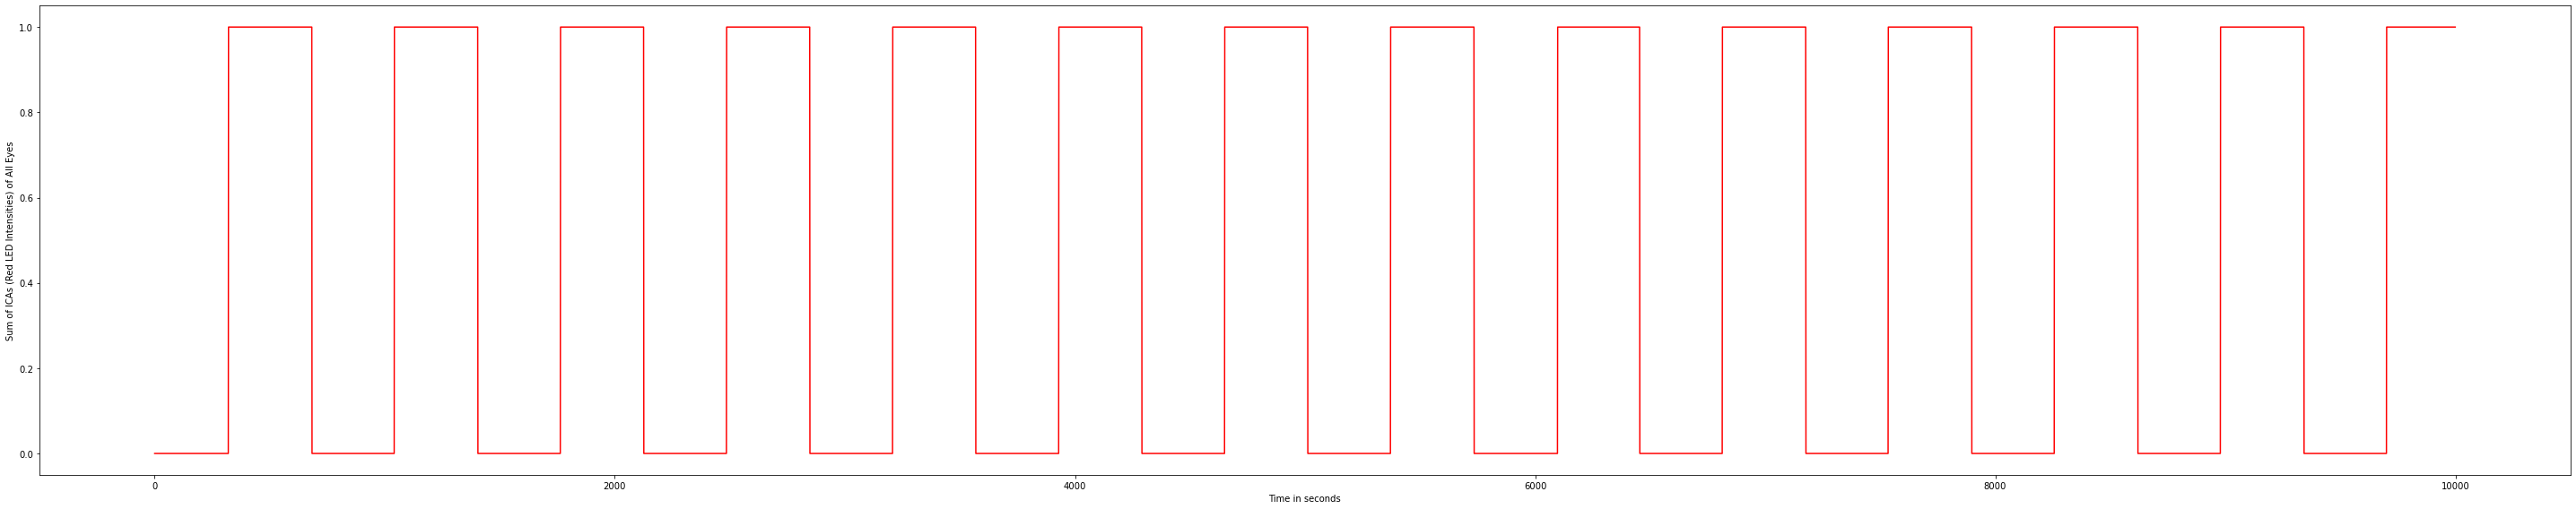

In [ ]:
fig, ax = plt.subplots(1, figsize=(40, 8)) #sharex="col", sharey=True )
dfs = [df0, df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11]        
df_final = ft.reduce(lambda left, right: pd.merge(left, right, on='key', how='outer', suffixes=(None, None)), dfs)  
df_final = df_final.sort_values('key')
# df_final = df_final.fillna(0)
df_final.interpolate(inplace=True
                    )
width = 7000

# print(df_final.head(n=100))
print(df_final.shape)
df_total = 0
for eye in range(12):
    # ax.plot(df_final['key'][:100], df_final["Red_LED_Intensity_%s" %(eye)][:100])
    df_total = df_total + df_final[f"Red_LED_Intensity_{eye}"]
    
# df_final['key'][:2500], df_total[:2500], c='r'

    
ax.plot(df_total.values[230000:240000] > 0, c='r')
ax.set_xlabel('Time in seconds')
ax.set_ylabel('Sum of ICAs (Red LED Intensities) of All Eyes')

# ax.set_xlim([df_final['key'][0], df_final['key'][width]])
plt.tight_layout()
plt.savefig('sum_of_ICAs_red_LED_intensity.png');

## Save ICA Intensity and Corresponding Timestamps

In [ ]:
import pandas 
ica_red = pandas.DataFrame({'Time_in_seconds' : [], 'ICA_red' : []})
print(len(df_final))
print(len(df_total))

ica_red.Time_in_seconds = df_final['key']

ica_red.ICA_red = df_total
# print(ica_red)
str_SaveName = r'/media/genzel/Data/Files/ICA/SummedICA_RED.csv'
print('done')

ica_red.to_csv(str_SaveName, index=False)


1405404
1405404
done


(1405404, 13)


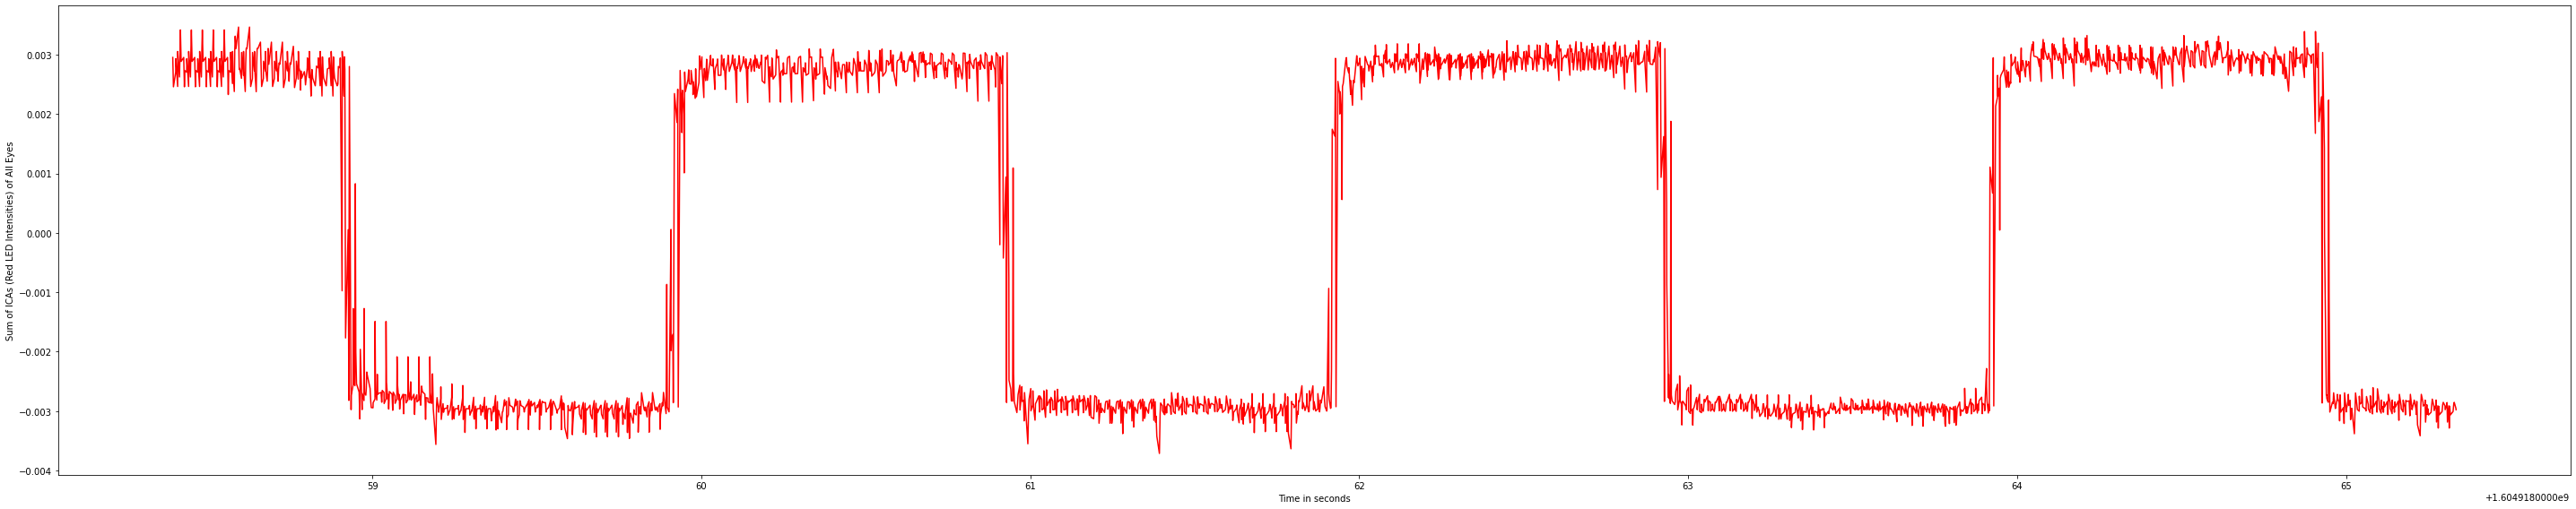

In [ ]:
fig, ax = plt.subplots(1, figsize=(40, 8)) #sharex="col", sharey=True )
dfs = [df0, df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11]        
df_final = ft.reduce(lambda left, right: pd.merge(left, right, on='key', how='outer', suffixes=(None, None)), dfs)  
df_final = df_final.sort_values('key')
df_final = df_final.fillna(0)
width = -1
# print(df_final.head(n=100))
print(df_final.shape)
df_total = 0
for eye in range(12):
    # ax.plot(df_final['key'][:100], df_final["Red_LED_Intensity_%s" %(eye)][:100])
    df_total = df_total + df_final["Red_LED_Intensity_%s" %(eye)]
    
ax.plot(df_final['key'][:2500], df_total[:2500], c='r')
ax.set_xlabel('Time in seconds')
ax.set_ylabel('Sum of ICAs (Red LED Intensities) of All Eyes')

# ax.set_xlim([df_final['key'][0], df_final['key'][width]])
plt.tight_layout()
plt.savefig('sum_of_ICAs_red_LED_intensity.png');

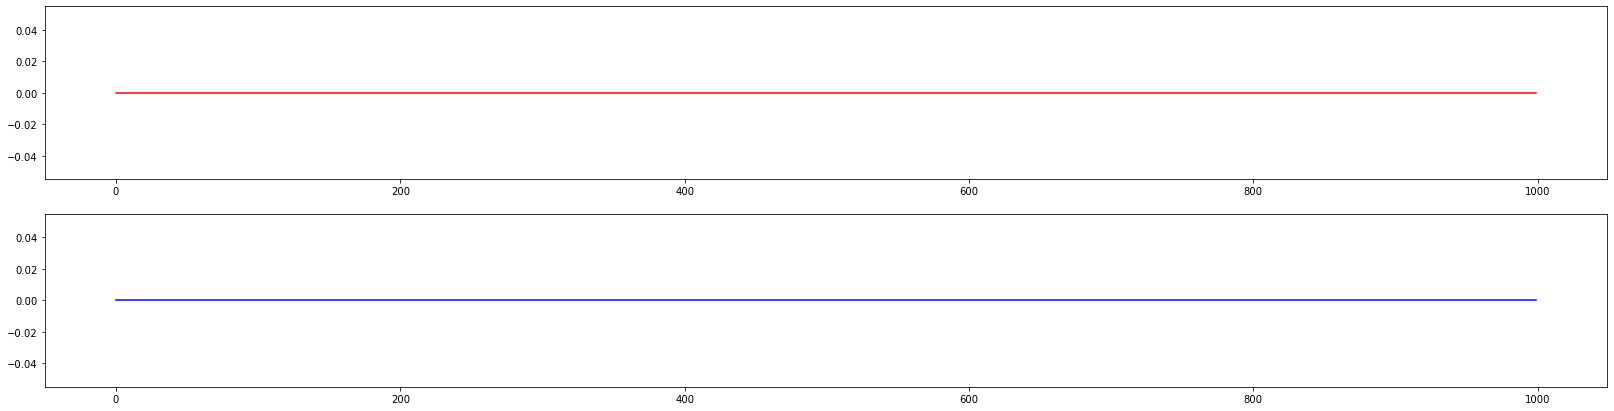

In [ ]:
fig, ax = plt.subplots(2, figsize=(28, 7))
for n, c in enumerate(['r', 'b']):
    ax[n].plot(led_signals[:1000, n], c=c)

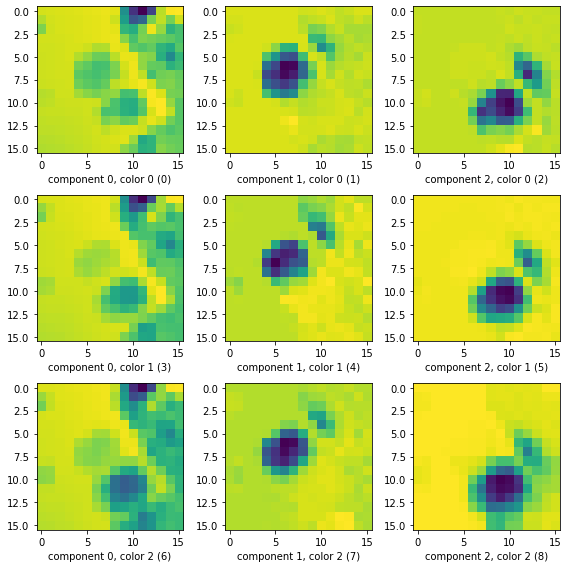

In [ ]:
comp = ica.mixing_.reshape(16, 16, 3, 3)
fig, ax = plt.subplots(3, 3, figsize=(8, 8))
for n in range(9):
    ax[n//3, n%3].imshow(comp[:,:,n//3,n%3])
    ax[n//3, n%3].set_xlabel(f'component {n%3}, color {n//3} ({n})')
plt.tight_layout()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


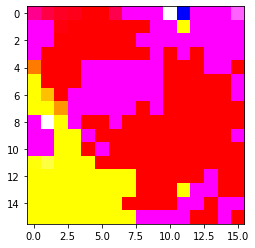

In [ ]:
comp = ica.mixing_.reshape(16, 16, 3, 3)
plt.imshow(comp[:,:,0,:])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


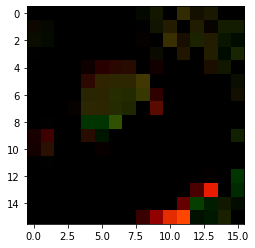

In [ ]:
compmax = comp / comp.max(axis=0).max(axis=0).max(axis=0)
plt.imshow(compmax[:,:,:,2])